<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day010_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#https://stackoverflow.com/questions/52305578/sift-cv2-xfeatures2d-sift-create-not-working-even-though-have-contrib-instal
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/First_CV_DL191125/lena.png'
img = cv2.imread(img_path)

# 以灰階方式讀入圖片
img_query = cv2.imread('/content/drive/My Drive/First_CV_DL191125/box.png', 0)
img_train = cv2.imread('/content/drive/My Drive/First_CV_DL191125/box_in_scene.png', 0)

# 建立 SIFT 物件
sift = cv2.xfeatures2d_SIFT.create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

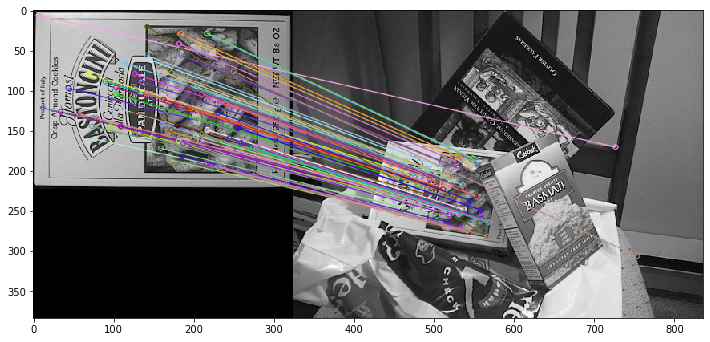

In [4]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

# 顯示圖片
plt.figure(figsize=(12, 7))
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show);